In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Neural Networks
import tensorflow
import keras

# AWS
import boto3

# Model
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
# Alters pictures
image_gen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0.0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=[0.2, 1.5],
    shear_range=0.0,
    zoom_range=[0.5, 1.5],
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=None,
    data_format=None)

In [4]:
# Loading Images
image_gen = image_gen.flow_from_directory(
    "SpecifiedData",
    target_size=(300, 300),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=1692,
    shuffle=True,
    seed=123,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    interpolation='nearest')

Found 1692 images belonging to 2 classes.


In [5]:
# Data Classes
image_gen.class_indices  # From directory (the way it was labeled)

{'Assault Rifle': 0, 'Handgun': 1}

In [6]:
image_gen.image_shape

(300, 300, 3)

## Images and Lables

In [7]:
# split images and labels
images, labels = next(image_gen)
images.shape, labels.shape

((1692, 300, 300, 3), (1692, 2))

## Showing Images

Classes:{'Assault Rifle': 0, 'Handgun': 1}
[0. 1.]


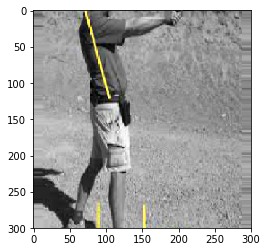

In [9]:
def show_image(n):
    
    print(f"Classes:{image_gen.class_indices}")
    plt.imshow(images[n])
    print(labels[n])
    
show_image(80)

## Train and Test Split

In [10]:
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.2, random_state=41)
X_model.shape, X_test.shape, y_model.shape, y_test.shape

((1353, 300, 300, 3), (339, 300, 300, 3), (1353, 2), (339, 2))

## Validation Set

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=41)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1082, 300, 300, 3), (271, 300, 300, 3), (1082, 2), (271, 2))

## Augmented Model

In [143]:
# Convenlutional Neural Network Model
cnn = keras.models.Sequential()

# 1st layer
cnn.add(keras.layers.Conv2D(64, (3, 3),
                      activation='relu',
                      input_shape=(300, 300,  3),
                      padding='SAME'))
cnn.add(keras.layers.MaxPooling2D((2, 2)))

# 2nd layer
cnn.add(keras.layers.Conv2D(32, (3, 3),
                            activation='relu', 
                            padding='SAME'))


# 3rd layer
cnn.add(keras.layers.Conv2D(15, (3, 3), 
                            activation='relu', 
                            padding='SAME'))
cnn.add(keras.layers.MaxPooling2D((2, 2)))

# Flatten images
cnn.add(keras.layers.Flatten())

# 5th layer
cnn.add(keras.layers.Dense(15, activation='relu'))
cnn.add(keras.layers.Dense(2, activation='softmax'))

# Producing Neural Network
cnn.compile(loss='binary_crossentropy',  # Loss function
            optimizer="sgd",  # Gradient Descent
            metrics=['acc'])  # Accuracy score

In [144]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='loss', factor=0.1, patience=20,
    verbose=0, mode='auto', min_lr=0)

In [145]:
# If there are problems with input data then it will stop it
nan_problem = keras.callbacks.TerminateOnNaN()

In [146]:
# Stops Epochs when modeling stops to improve
early_stop = keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0, patience=20,
    verbose=0, mode='auto')

In [147]:
print(cnn.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 300, 300, 64)      1792      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 150, 150, 32)      18464     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 150, 150, 15)      4335      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 75, 75, 15)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 84375)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 15)              

In [ ]:
cnn1 = cnn.fit_generator(data_gen.flow(X_train, y_train, batch_size=32), 
                                 steps_per_epoch=len(X_train)/32, 
                                 epochs=80, 
                                 callbacks=[early_stop, nan_problem, reduce_lr], 
                                 validation_data=(X_val, y_val))

Epoch 1/80
34/33 [==============================] - 165s 5s/step - loss: 0.6744 - acc: 0.6146 - val_loss: 0.5670 - val_acc: 0.7196
Epoch 2/80
34/33 [==============================] - 159s 5s/step - loss: 0.6287 - acc: 0.6460 - val_loss: 0.5705 - val_acc: 0.7085
Epoch 3/80
34/33 [==============================] - 160s 5s/step - loss: 0.6236 - acc: 0.6553 - val_loss: 0.5563 - val_acc: 0.7380
Epoch 4/80
34/33 [==============================] - 159s 5s/step - loss: 0.6195 - acc: 0.6608 - val_loss: 0.5579 - val_acc: 0.7269
Epoch 5/80
34/33 [==============================] - 159s 5s/step - loss: 0.6222 - acc: 0.6543 - val_loss: 0.5791 - val_acc: 0.6900
Epoch 6/80
34/33 [==============================] - 159s 5s/step - loss: 0.6141 - acc: 0.6765 - val_loss: 0.5594 - val_acc: 0.7232
Epoch 7/80
34/33 [==============================] - 159s 5s/step - loss: 0.5961 - acc: 0.6765 - val_loss: 0.5602 - val_acc: 0.6974
Epoch 8/80
14/33 [===========>..................] - ETA: 1:27 - loss: 0.5725 - acc:

In [151]:
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

339/339 [==============================] - 10s 30ms/step
[0.14952313076436188, 0.9426987171173096] [0.5196435792607895, 0.7846607565879822]
